In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
url = "/content/drive/MyDrive/cs-training.csv"
data = pd.read_csv(url)
data = shuffle(data)
data = data.drop(data.iloc[:, 0:1],axis = 1)
data = imp_mean.fit_transform(data)
X_train = data[:,1:len(data)]
Y_train = data[:,0]
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size=0.30, random_state = 0)

In [ ]:
urltest = "/content/drive/MyDrive/cs-test.csv"
data = pd.read_csv(urltest)
data = data.drop(data.iloc[:, 0:1],axis = 1)
X_test = imp_mean.fit_transform(data)

In [ ]:
url3 = "/content/drive/MyDrive/sampleEntry.csv"
data = pd.read_csv(url3)
data = data.drop(data.iloc[:, 0:1],axis = 1).values
Y_test = []
for i in data:
  if(i > 0.5):
    Y_test.append(1)
  else:
    Y_test.append(0)

Accuracy Score For Test (max depth = 4) : 0.9871924967734944
Precision Score For Test (max depth = 4) : 0.9871924967734944
Recall Score For Test (max depth = 4) : 0.9871924967734944

Accuracy Score For Test (max depth = 6) : 0.988138281627144
Precision Score For Test (max depth = 6) : 0.988138281627144
Recall Score For Test (max depth = 6) : 0.988138281627144

Accuracy Score For Test (max depth = 8) : 0.9859807099297557
Precision Score For Test (max depth = 8) : 0.9859807099297557
Recall Score For Test (max depth = 8) : 0.9859807099297557

Accuracy Score For Test (max depth = 10) : 0.9830940957410126
Precision Score For Test (max depth = 10) : 0.9830940957410126
Recall Score For Test (max depth = 10) : 0.9830940957410126

Accuracy Score For Test (max depth = 12) : 0.9787986561973537
Precision Score For Test (max depth = 12) : 0.9787986561973537
Recall Score For Test (max depth = 12) : 0.9787986561973537

Accuracy Score For Test (max depth = 15) : 0.9694590307675636
Precision Score For 

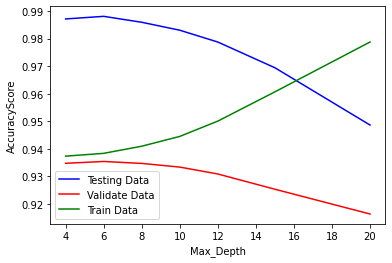

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
arr = [4,6,8,10,12,15,20]
test_plot = []
validate_plot = []
train_plot = []
for i in arr:
  model = DecisionTreeClassifier(max_depth = i)  # default gini
  model = model.fit(X_train,Y_train)
  pred_test = model.predict(X_test)
  val_test = model.predict(X_validate)
  train_test = model.predict(X_train)
  accuracy_score_test = accuracy_score(Y_test,pred_test)
  recall_score_test = recall_score(Y_test,pred_test,average = "micro")
  precision_score_test = precision_score(Y_test,pred_test,average = "micro")
  test_plot.append(accuracy_score_test)

  recall_score_validate = recall_score(Y_validate, val_test, average = "micro")
  precision_score_validate = precision_score(Y_validate, val_test, average = "micro")
  accuracy_score_validate = accuracy_score(Y_validate, val_test)
  validate_plot.append(accuracy_score_validate)

  recall_score_train = recall_score(Y_train, train_test, average = "micro")
  precision_score_train = precision_score(Y_train, train_test, average = "micro")
  accuracy_score_train = accuracy_score(Y_train, train_test)
  train_plot.append(accuracy_score_train)
  print("Accuracy Score For Test (max depth = " + str(i) + ") : " + str(accuracy_score_test))
  print("Precision Score For Test (max depth = " + str(i) + ") : " + str(precision_score_test))
  print("Recall Score For Test (max depth = " + str(i) + ") : " + str(recall_score_test))
  print()
plt.xlabel("Max_Depth")
plt.ylabel("AccuracyScore")
plt.plot(arr,test_plot,'b',label = "Testing Data")
plt.plot(arr,validate_plot,'r',label = "Validate Data")
plt.plot(arr,train_plot,'g',label = "Train Data")
plt.legend()

Accuracy Score For Test (max depth = 4) : 0.9879707988926436
Precision Score For Test (max depth = 4) : 0.9879707988926436
Recall Score For Test (max depth = 4) : 0.9879707988926436

Accuracy Score For Test (max depth = 8) : 0.9862565638454036
Precision Score For Test (max depth = 8) : 0.9862565638454036
Recall Score For Test (max depth = 8) : 0.9862565638454036

Accuracy Score For Test (max depth = 10) : 0.9835472843167197
Precision Score For Test (max depth = 10) : 0.9835472843167197
Recall Score For Test (max depth = 10) : 0.9835472843167197

Accuracy Score For Test (max depth = 12) : 0.979044954336325
Precision Score For Test (max depth = 12) : 0.979044954336325
Recall Score For Test (max depth = 12) : 0.979044954336325

Accuracy Score For Test (max depth = 15) : 0.9696560692787405
Precision Score For Test (max depth = 15) : 0.9696560692787405
Recall Score For Test (max depth = 15) : 0.9696560692787405

Accuracy Score For Test (max depth = 18) : 0.9601194053377733
Precision Score F

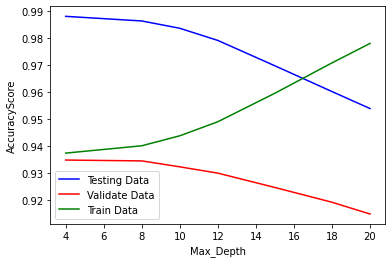

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
arr = [4,8,10,12,15,18,20]
test_plot = []
validate_plot = []
train_plot = []
for i in arr:
  model = DecisionTreeClassifier(max_depth = i, criterion = "entropy")
  model = model.fit(X_train,Y_train)
  pred_test = model.predict(X_test)
  val_test = model.predict(X_validate)
  train_test = model.predict(X_train)
  accuracy_score_test = accuracy_score(Y_test,pred_test)
  recall_score_test = recall_score(Y_test,pred_test,average = "micro")
  precision_score_test = precision_score(Y_test,pred_test,average = "micro")
  test_plot.append(accuracy_score_test)

  recall_score_validate = recall_score(Y_validate, val_test, average = "micro")
  precision_score_validate = precision_score(Y_validate, val_test, average = "micro")
  accuracy_score_validate = accuracy_score(Y_validate, val_test)
  validate_plot.append(accuracy_score_validate)

  recall_score_train = recall_score(Y_train, train_test, average = "micro")
  precision_score_train = precision_score(Y_train, train_test, average = "micro")
  accuracy_score_train = accuracy_score(Y_train, train_test)
  train_plot.append(accuracy_score_train)
  print("Accuracy Score For Test (max depth = " + str(i) + ") : " + str(accuracy_score_test))
  print("Precision Score For Test (max depth = " + str(i) + ") : " + str(precision_score_test))
  print("Recall Score For Test (max depth = " + str(i) + ") : " + str(recall_score_test))
  print()
plt.xlabel("Max_Depth")
plt.ylabel("AccuracyScore")
plt.plot(arr,test_plot,'b',label = "Testing Data")
plt.plot(arr,validate_plot,'r',label = "Validate Data")
plt.plot(arr,train_plot,'g',label = "Train Data")
plt.legend()

Accuracy Score For Training (max depth = 4) : 0.9373238095238096
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     97975
         1.0       0.60      0.19      0.29      7025

    accuracy                           0.94    105000
   macro avg       0.77      0.59      0.63    105000
weighted avg       0.92      0.94      0.92    105000



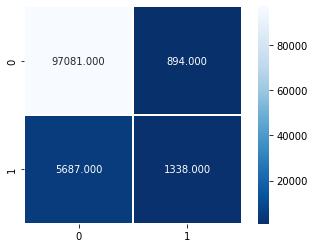

In [ ]:
import seaborn as sns
model = DecisionTreeClassifier(max_depth = 4, criterion = "entropy")
model = model.fit(X_train,Y_train)
pred_train = model.predict(X_train)
accuracy_score_train = accuracy_score(Y_train,pred_train)
print("Accuracy Score For Training (max depth = " + str(4) + ") : " + str(accuracy_score_train))
print(classification_report(Y_train,pred_train))
cm = confusion_matrix(Y_train,pred_train)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

Accuracy Score For Validate (max depth = 4) : 0.9347555555555556
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     41999
         1.0       0.53      0.17      0.26      3001

    accuracy                           0.93     45000
   macro avg       0.74      0.58      0.61     45000
weighted avg       0.92      0.93      0.92     45000



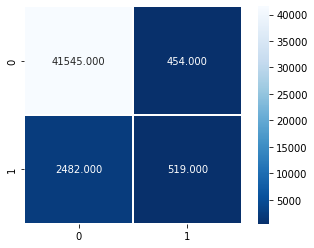

In [ ]:
pred_validate = model.predict(X_validate)
accuracy_score_validate = accuracy_score(Y_validate,pred_validate)
print("Accuracy Score For Validate (max depth = " + str(4) + ") : " + str(accuracy_score_validate))
print(classification_report(Y_validate,pred_validate))
cm = confusion_matrix(Y_validate,pred_validate)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

Accuracy Score For Validate (max depth = 4) : 0.9879707988926436
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     99798
           1       0.61      0.78      0.69      1705

    accuracy                           0.99    101503
   macro avg       0.80      0.89      0.84    101503
weighted avg       0.99      0.99      0.99    101503



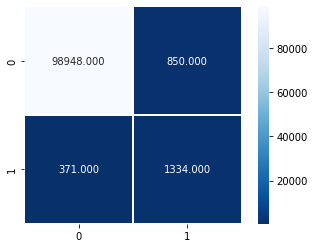

In [ ]:
pred_test = model.predict(X_test)
accuracy_score_test = accuracy_score(Y_test,pred_test)
print("Accuracy Score For Validate (max depth = " + str(4) + ") : " + str(accuracy_score_test))
print(classification_report(Y_test,pred_test))
cm = confusion_matrix(Y_test,pred_test)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

Accuracy Score For Training (max depth = 6) : 0.9383714285714285
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     97975
         1.0       0.63      0.19      0.30      7025

    accuracy                           0.94    105000
   macro avg       0.79      0.59      0.63    105000
weighted avg       0.92      0.94      0.92    105000



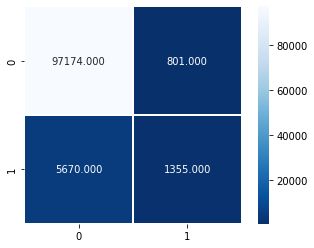

In [ ]:
import seaborn as sns
model = DecisionTreeClassifier(max_depth = 6)
model = model.fit(X_train,Y_train)
pred_train = model.predict(X_train)
accuracy_score_train = accuracy_score(Y_train,pred_train)
print("Accuracy Score For Training (max depth = " + str(6) + ") : " + str(accuracy_score_train))
print(classification_report(Y_train,pred_train))
cm = confusion_matrix(Y_train,pred_train)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

Accuracy Score For Validate (max depth = 6) : 0.9354222222222223
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.97     41999
         1.0       0.55      0.17      0.26      3001

    accuracy                           0.94     45000
   macro avg       0.75      0.58      0.61     45000
weighted avg       0.92      0.94      0.92     45000



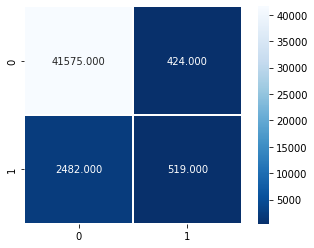

In [ ]:
pred_validate = model.predict(X_validate)
accuracy_score_validate = accuracy_score(Y_validate,pred_validate)
print("Accuracy Score For Validate (max depth = " + str(6) + ") : " + str(accuracy_score_validate))
print(classification_report(Y_validate,pred_validate))
cm = confusion_matrix(Y_validate,pred_validate)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');

Accuracy Score For Testing (max depth = 6) : 0.9881087258504675
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     99798
           1       0.62      0.76      0.68      1705

    accuracy                           0.99    101503
   macro avg       0.81      0.88      0.84    101503
weighted avg       0.99      0.99      0.99    101503



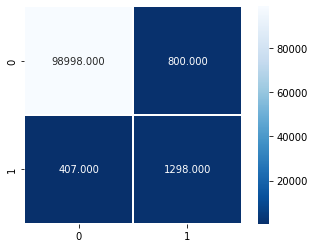

In [ ]:
pred_test = model.predict(X_test)
accuracy_score_test = accuracy_score(Y_test,pred_test)
print("Accuracy Score For Testing (max depth = " + str(6) + ") : " + str(accuracy_score_test))
print(classification_report(Y_test,pred_test))
cm = confusion_matrix(Y_test,pred_test)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');